<a href="https://colab.research.google.com/github/daiki-skm/oreilly-web-optimization/blob/main/chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

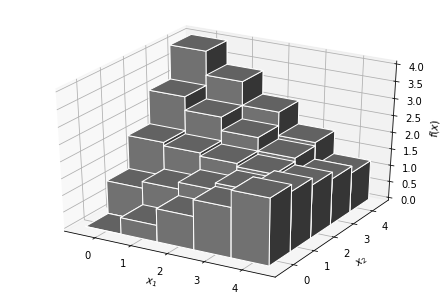

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

size = 5
_x1, _x2 = np.meshgrid(np.arange(size), np.arange(size))
x1, x2 = _x1.ravel(), _x2.ravel()

f = lambda x1,x2: 0.5*x1+x2-0.3*x1*x2
ax.bar3d(x1,x2,0,1,1,f(x1,x2),color='gray',edgecolor='white',shade=True)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x)$')
plt.xticks(np.arange(0.5,size,1),range(size))
plt.yticks(np.arange(0.5,size,1),range(size))
plt.show()

In [2]:
def is_valid(x):
  return all(-1<i<size for i in list(x))

class HillClimbing:
  def __init__(self, init_x, init_f):
    self.current_x = init_x
    self.current_f = init_f
  
  def get_neighbors(self):
    neighbor_xs = []
    for i, xi in enumerate(self.current_x):
      neighbor_x = list(self.current_x)
      neighbor_x[i] += 1
      if is_valid(neighbor_x):
        neighbor_xs.append(tuple(neighbor_x))
      
      neighbor_x = list(self.current_x)
      neighbor_x[i] -= 1
      if is_valid(neighbor_x):
        neighbor_xs.append(tuple(neighbor_x))
    return neighbor_xs
  
  def update(self, neighbor_xs, neighbor_fs):
    old_x = self.current_x
    if max(neighbor_fs) > self.current_f:
      self.current_x = neighbor_xs[neighbor_fs.index(max(neighbor_fs))]
      self.current_f = max(neighbor_fs)
    return (old_x, self.current_x)

In [3]:
init_x = (0,0)
init_f = f(init_x[0], init_x[1])
hc = HillClimbing(init_x, init_f)
evaluated_xs = {init_x}
steps = []
for _ in range(6):
  neighbor_xs = hc.get_neighbors()
  neighbor_fs = [f(x[0],x[1]) for x in neighbor_xs]
  step = hc.update(neighbor_xs, neighbor_fs)
  print('%s -> %s'%(step))
  steps.append(step)
  evaluated_xs.update(neighbor_xs)

(0, 0) -> (0, 1)
(0, 1) -> (0, 2)
(0, 2) -> (0, 3)
(0, 3) -> (0, 4)
(0, 4) -> (0, 4)
(0, 4) -> (0, 4)


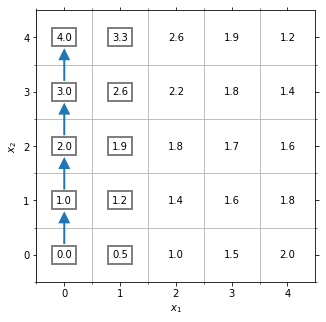

In [4]:
import matplotlib.ticker as ticker

def visualize_path(evaluated_xs, steps):
  fig, ax = plt.subplots(figsize=(5,5))
  ax.set_xlim(-.5,size -.5)
  ax.set_ylim(-.5,size -.5)

  for i in range(size):
    for j in range(size):
      if (i,j) in evaluated_xs:
        ax.text(i,j,'%.1f'%(f(i,j)),ha='center',va='center',bbox=dict(edgecolor='gray',facecolor='none',linewidth=2))
      else:
        ax.text(i,j,'%.1f'%(f(i,j)),ha='center',va='center')
    
  ax.set_xlabel('$x_1$')
  ax.set_ylabel('$x_2$')
  ax.xaxis.set_minor_locator(ticker.FixedLocator(np.arange(-.5,size-.5,1)))
  ax.yaxis.set_minor_locator(ticker.FixedLocator(np.arange(-.5,size-.5,1)))
  plt.tick_params(axis='both',which='both',bottom='off',top='off',left='off',right='off',labelbottom='off',labelleft='off')
  ax.grid(True,which='minor')
  ax.grid(False,which='major')

  for step in steps:
    ax.annotate('',xy=step[1],xytext=step[0],arrowprops=dict(shrink=0.2,width=2,lw=0))

visualize_path(evaluated_xs,steps)

(4, 2) -> (4, 1)
(4, 1) -> (4, 0)
(4, 0) -> (4, 0)
(4, 0) -> (4, 0)
(4, 0) -> (4, 0)
(4, 0) -> (4, 0)


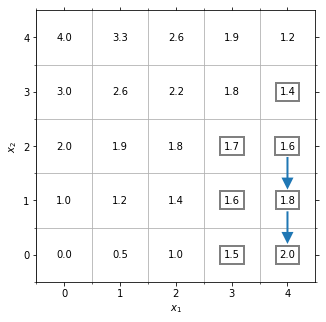

In [5]:
init_x = (4,2)
init_f = f(init_x[0], init_x[1])
hc = HillClimbing(init_x, init_f)
evaluated_xs = {init_x}
steps = []
for _ in range(6):
  neighbor_xs = hc.get_neighbors()
  neighbor_fs = [f(x[0],x[1]) for x in neighbor_xs]
  step = hc.update(neighbor_xs, neighbor_fs)
  print('%s -> %s'%(step))
  steps.append(step)
  evaluated_xs.update(neighbor_xs)
visualize_path(evaluated_xs,steps)

In [6]:
import random

class RandomizeHillClimbing:
  def __init__(self, init_x, init_f):
    self.current_x = init_x
    self.current_f = init_f
  
  def get_neighbors(self):
    neighbor_xs = []
    for i, xi in enumerate(self.current_x):
      neighbor_x = list(self.current_x)
      neighbor_x[i] += 1
      if is_valid(neighbor_x):
        neighbor_xs.append(tuple(neighbor_x))
      
      neighbor_x = list(self.current_x)
      neighbor_x[i] -= 1
      if is_valid(neighbor_x):
        neighbor_xs.append(tuple(neighbor_x))
    return neighbor_xs

  def get_neighbor(self):
    return random.choice(self.get_neighbors())

  def update(self, neighbor_x, neighbor_f):
    old_x = self.current_x
    if self.current_f < neighbor_f:
      self.current_x = neighbor_x
      self.current_f = neighbor_f
    return (old_x, self.current_x)

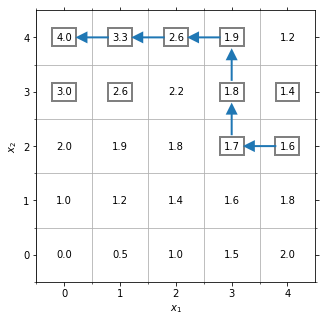

In [8]:
init_x = (4,2)
init_f = f(init_x[0], init_x[1])
rhc = RandomizeHillClimbing(init_x, init_f)
evaluated_xs = {init_x}
steps = []
random.seed(0)
for _ in range(30):
  neighbor_x = rhc.get_neighbor()
  neighbor_f = f(neighbor_x[0],neighbor_x[1])
  step = rhc.update(neighbor_x, neighbor_f)
  steps.append(step)
  evaluated_xs.add(neighbor_x)
visualize_path(evaluated_xs,steps)

In [9]:
class SimulatedAnnealing:
  def __init__(self, init_x, init_f):
    self.current_x = init_x
    self.current_f = init_f
    self.temperature = 10
  
  def get_neighbors(self):
    neighbor_xs = []
    for i, xi in enumerate(self.current_x):
      neighbor_x = list(self.current_x)
      neighbor_x[i] += 1
      if is_valid(neighbor_x):
        neighbor_xs.append(tuple(neighbor_x))
      
      neighbor_x = list(self.current_x)
      neighbor_x[i] -= 1
      if is_valid(neighbor_x):
        neighbor_xs.append(tuple(neighbor_x))
    return neighbor_xs

  def get_neighbor(self):
    return random.choice(self.get_neighbors())

  def accept_prob(self,f):
    return np.exp((f-self.current_f)/max(self.temperature,0.01))

  def update(self, neighbor_x, neighbor_f):
    old_x = self.current_x
    if random.random() < self.accept_prob(neighbor_f):
      self.current_x = neighbor_x
      self.current_f = neighbor_f
    self.temperature *= 0.8
    return (old_x, self.current_x)

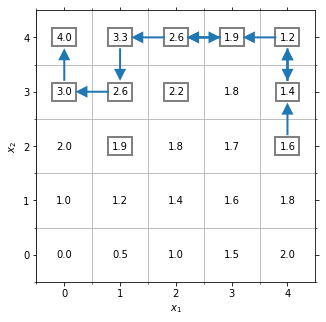

In [10]:
init_x = (4,2)
init_f = f(init_x[0], init_x[1])
sa = SimulatedAnnealing(init_x, init_f)
evaluated_xs = {init_x}
steps = []
random.seed(0)
for _ in range(30):
  neighbor_x = sa.get_neighbor()
  evaluated_xs.add(neighbor_x)
  neighbor_f = f(neighbor_x[0],neighbor_x[1])
  step = sa.update(neighbor_x, neighbor_f)
  steps.append(step)
visualize_path(evaluated_xs,steps)

In [11]:
np.random.seed(0)
N = 10
size = 8
solutions = [np.random.randint(0,2,size=size*size//2) for _ in range(N)]

In [13]:
def represent(solution):
  return np.hstack((solution.reshape(size,size//2), solution.reshape(size,size//2)[:, ::-1]))

In [14]:
def visualize(solutions):
  rows = 2
  cols = N//rows
  i = 0
  for row in range(rows):
    for col in range(cols):
      plt.subplot(rows,cols,i+1)
      plt.imshow(represent(solutions[i]))
      plt.axis('off')
      plt.title(i)
      i += 1

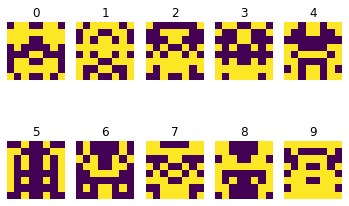

In [15]:
visualize(solutions)
plt.show()

In [16]:
def crossover(sol1,sol2):
  thres = np.random.randint(0,size*size//2)
  new_solution = np.hstack((sol1[:thres],sol2[thres:]))
  return new_solution

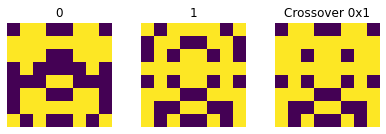

In [17]:
plt.subplot(1,3,1)
plt.imshow(represent(solutions[0]))
plt.title('0')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(represent(solutions[1]))
plt.title('1')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(represent(crossover(solutions[0],solutions[1])))
plt.title('Crossover 0x1')
plt.axis('off')

plt.tight_layout(pad=3)
plt.show()

In [18]:
def mutation(solution):
  mut = np.random.randint(0,size*size//2)
  new_solution = solution.copy()
  new_solution[mut] = (new_solution[mut]+1)%2
  return new_solution

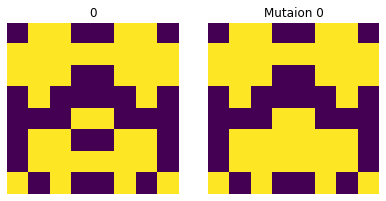

In [19]:
plt.subplot(1,2,1)
plt.imshow(represent(solutions[0]))
plt.title('0')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(represent(mutation(solutions[0])))
plt.title('Mutaion 0')
plt.axis('off')

plt.tight_layout(pad=3)
plt.show()

In [20]:
def new_generation(parents,mut_n=3):
  solutions = []
  for _ in range(N):
    [i,j] = np.random.choice(range(len(parents)),2,replace=False)
    child = crossover(parents[i],parents[j])
    solutions.append(child)
  for i in range(mut_n):
    solutions[i] = mutation(solutions[i])
  return solutions

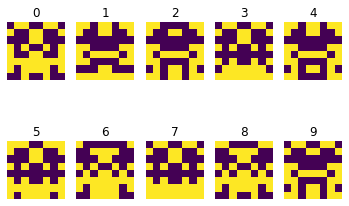

In [21]:
solutions = new_generation([solutions[2],solutions[3],solutions[4],solutions[9]])
visualize(solutions)
plt.show()

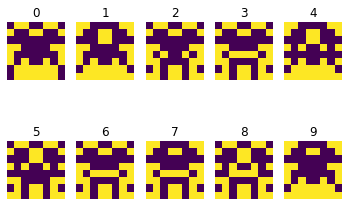

In [22]:
solutions = new_generation([solutions[2],solutions[3],solutions[9]])
visualize(solutions)
plt.show()

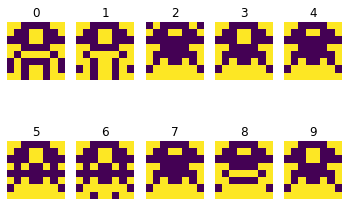

In [23]:
solutions = new_generation([solutions[1],solutions[4],solutions[7],solutions[9]])
visualize(solutions)
plt.show()

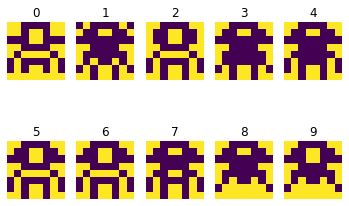

In [24]:
solutions = new_generation([solutions[0],solutions[7]])
visualize(solutions)
plt.show()